# Examine the uncertainty in elicited eruption probabilities

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [40]:
def probconv(durold, durnew, probold):
    #function to convert probablilities from one duration to another, formula copied from Natalia Deligne's spreadsheet
    #durold and durnew are durations, these are given in whole units of weeks
    prober = probold
    dur = durold
     
    probnoer = 1 - prober #probablility of no eruption
    durh = dur * 7 * 24 #duration in hours
      
    probnoerh = probnoer**(1/durh) #probablility per hour, directly converted
    probnoernew = probnoerh**(durnew * 7 * 24) #new probability of no eruption, for the new duration
    probnew = 1 - probnoernew # probability of an eruption
    
    return(probnew)

In [41]:
probconv(4, 13, 0.2)

0.5157802961904123

## Ruapehu

In [42]:
rua1 = pd.read_excel('/home/sherburn/Dropbox/work/elicitation/Elicitation_values_mastersheet.xlsx', sheet_name='Ruapehu', parse_dates=True, index_col=None)
rua1.head()

#durations as numeric values
rua1['Duration'] = rua1['Duration'].map({'12 weeks':12, '13 weeks':13, '4 weeks':4})

/home/sherburn/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


In [43]:
rua1.tail()

,Date,Duration,Best guess,Min,Max
182,2018-06-11,13,0.03,0.02,0.040
183,2018-06-11,13,0.04,0.01,0.120
184,2018-06-11,13,0.05,0.01,0.075
185,2018-06-11,13,0.05,0.03,0.080
186,2018-06-11,13,0.08,0.01,0.150


In [44]:
#duplicate dataframe, set all Min and Max to NaN
rua2 = rua1.copy()
rua2['Min'] = np.nan
rua2['Max'] = np.nan
rua2.head()

,Date,Duration,Best guess,Min,Max
0,2014-01-28,12,0.005,NaN,NaN
1,2014-01-28,12,0.007,NaN,NaN
2,2014-01-28,12,0.010,NaN,NaN
3,2014-01-28,12,0.010,NaN,NaN
4,2014-01-28,12,0.050,NaN,NaN


In [45]:
#join the two together, effectively duplicating best guess values
rua = pd.concat([rua1, rua2], axis='rows')

**Basic statistics of observations**

In [176]:
ruadesc = rua.groupby(by='Date').describe().reset_index()
#convert to dataframe
ruadesc.set_index('Date', inplace=True)
ruadesc.head(10)

Best guess                                                      \
                count      mean       std    min      25%     50%     75%   
Date                                                                        
2014-01-28       20.0  0.049200  0.045500  0.005  0.01000  0.0500  0.0600   
2014-04-28       18.0  0.041111  0.036037  0.005  0.01000  0.0500  0.0500   
2014-07-14       16.0  0.043750  0.034132  0.005  0.00875  0.0500  0.0575   
2014-10-13       16.0  0.039500  0.032668  0.005  0.00900  0.0375  0.0600   
2015-01-12       16.0  0.041375  0.028439  0.006  0.02500  0.0425  0.0500   
2015-04-13       16.0  0.037750  0.019230  0.005  0.03175  0.0500  0.0500   
2015-07-13       16.0  0.039625  0.018576  0.007  0.04000  0.0500  0.0500   
2015-10-12       16.0  0.032750  0.018596  0.005  0.01675  0.0400  0.0500   
2016-01-11       16.0  0.029625  0.017427  0.005  0.01675  0.0325  0.0425   
2016-04-11       16.0  0.029000  0.015258  0.005  0.02425  0.0300  0.0400   

                   Max            ...                    Min            \
             max count      mean  ...        75%   max count      mean   
Date                              ...                                    
2014-01-28  0.15  10.0  0.108500  ...    0.18250  0.20  10.0  0.024610   
2014-04-28  0.11   9.0  0.076444  ...    0.10000  0.18   9.0  0.013233   
2014-07-14  0.10   8.0  0.082250  ...    0.10000  0.20   8.0  0.017263   
2014-10-13  0.10   8.0  0.091750  ...    0.12500  0.20   8.0  0.010200   
2015-01-12  0.10   8.0  0.096125  ...    0.12500  0.20   8.0  0.016750   
2015-04-13  0.05   8.0  0.071125  ...    0.10000  0.10   8.0  0.013513   
2015-07-13  0.05   8.0  0.078625  ...    0.10000  0.10   8.0  0.016000   
2015-10-12  0.05   8.0  0.061125  ...    0.08500  0.10   8.0  0.015388   
2016-01-11  0.05   8.0  0.058875  ...    0.07875  0.10   8.0  0.010075   
2016-04-11  0.05   8.0  0.055125  ...    0.07750  0.10   8.0  0.009875   

                                                                 
                 std     min       25%      50%      75%    max  
Date                                                             
2014-01-28  0.031481  0.0001  0.005000  0.01000  0.03625  0.100  
2014-04-28  0.014811  0.0001  0.001000  0.01000  0.02500  0.040  
2014-07-14  0.019072  0.0001  0.001750  0.01000  0.02875  0.050  
2014-10-13  0.012728  0.0001  0.002500  0.00875  0.01000  0.040  
2015-01-12  0.016325  0.0010  0.008250  0.01000  0.02250  0.050  
2015-04-13  0.010511  0.0001  0.008250  0.01000  0.02125  0.030  
2015-07-13  0.012166  0.0030  0.008750  0.01000  0.02625  0.035  
2015-10-12  0.011432  0.0001  0.008250  0.01500  0.02250  0.030  
2016-01-11  0.007103  0.0001  0.006375  0.01000  0.01250  0.020  
2016-04-11  0.007605  0.0010  0.004500  0.00750  0.01625  0.020  

[10 rows x 24 columns]

**Plot range, minimum to maximum for each elicitation**

In [177]:
#values needed for fill_between
t = ruadesc.index.values

#global range
minmin = ruadesc.Min['min']
maxmax = ruadesc.Max['max']

#range of best guess
minbest = ruadesc['Best guess']['min']
maxbest = ruadesc['Best guess']['max']

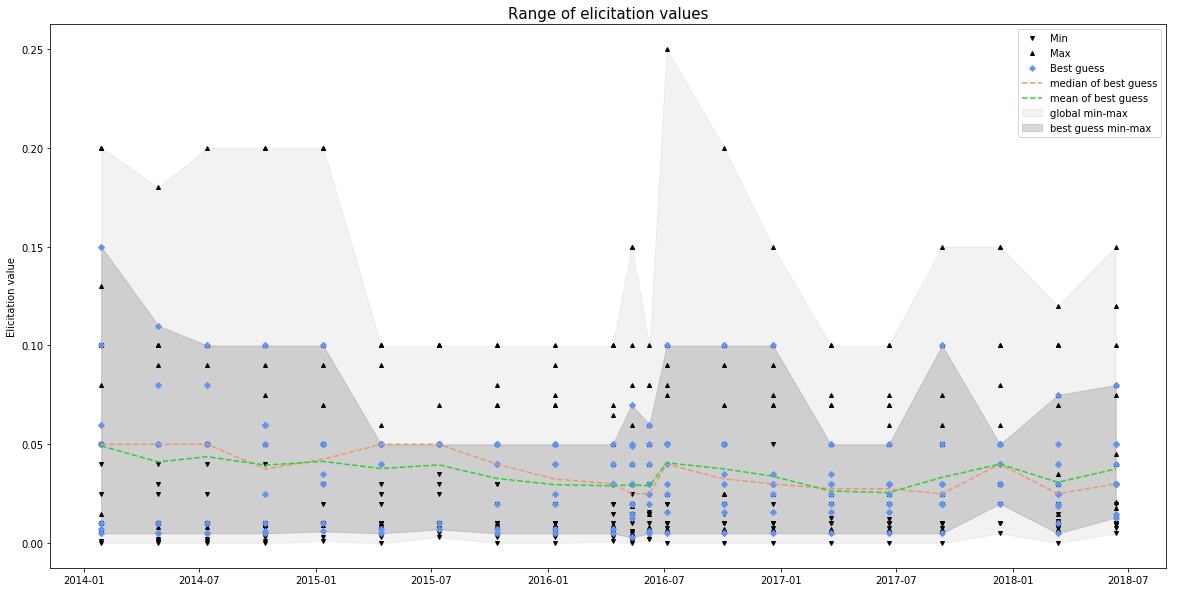

In [205]:
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(20,10))

#fill areas
ax.fill_between(t, minmin, maxmax, color='gray', alpha=0.1, label='global min-max')
ax.fill_between(t, minbest, maxbest, color='gray', alpha=0.3, label='best guess min-max')

#actual elicitation values
ax.plot(rua['Date'], rua['Min'], marker='v', markersize=4, linestyle='None', color='black', label='Min')
ax.plot(rua['Date'], rua['Max'], marker='^', markersize=4, linestyle='None', color='black', label='Max')
ax.plot(rua['Date'], rua['Best guess'], marker='D', markersize=4, linestyle='None', color='cornflowerblue', label='Best guess')


ax.plot(ruadesc['Best guess']['50%'], color='darksalmon', linestyle='--', label='median of best guess')
ax.plot(ruadesc['Best guess']['mean'], color='limegreen', linestyle='--', label='mean of best guess')

ax.set_title('Range of elicitation values',fontdict={'fontsize':15})
ax.set_ylabel('Elicitation value')
ax.legend(loc='best')